## Example two-layer classifier models

Below example code is given for creating instances of the CIFAR-10 and CIFAR-100 data provider objects and using them to train simple two-layer feedforward network models with rectified linear activations in TensorFlow. You may wish to use this code as a starting point for your own experiments.

In [1]:
import os
import tensorflow as tf
import numpy as np
import time
from mlp.data_providers import CIFAR10DataProvider, CIFAR100DataProvider
import matplotlib.pyplot as plt
%matplotlib inline

1,different activation functions : change in defination of fully_connected_layer
2,different hidden layer depths: change the construction of net
3,different widths,: change num_hidden
4,different learning rate schedules, 
5,different normalisation, 
6,different regularisation.


### CIFAR-10

In [2]:
train_data = CIFAR10DataProvider('train', batch_size=50)## size of each batch, so we will go through all data by 50  data points one iteration
valid_data = CIFAR10DataProvider('valid', batch_size=50)

In [3]:
train_data = CIFAR100DataProvider('train', batch_size=50)
valid_data = CIFAR100DataProvider('valid', batch_size=50)

In [4]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.relu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

# Influence of activation functions

#E1.1

In [5]:
activations = [tf.nn.relu,tf.nn.sigmoid,tf.nn.tanh,tf.nn.elu]
epoch=50
running_error_=np.zeros((len(activations),epoch))
running_accuracy_ = np.zeros((len(activations),epoch))
valid_error_ = np.zeros((len(activations),epoch))
valid_accuracy_ = np.zeros((len(activations),epoch))
loop=0
## store result in 4 arrays
for activation in activations:
    print(activation.func_name+"--------------------------------------------------")
    inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
    targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
    num_hidden = 200

    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden, nonlinearity=activation)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)

    with tf.name_scope('error'):
        error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), tf.float32))

    with tf.name_scope('train'):
        
        train_step = tf.train.AdamOptimizer().minimize(error) # update data

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for e in range(epoch):
            run_start_time = time.time()
            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches # divide according to the number of batches
            running_accuracy /= train_data.num_batches
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))
            running_error_[loop][e]=running_error
            running_accuracy_[loop][e]=running_accuracy
            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                    .format(valid_error, valid_accuracy))
            valid_error_[loop][e]=valid_error
            valid_accuracy_[loop][e]=valid_accuracy
            run_time = time.time() - run_start_time
            print('time for one epoch',run_time)
    loop+=1
                

relu--------------------------------------------------
End of epoch 01: err(train)=4.33 acc(train)=0.04
                 err(valid)=4.09 acc(valid)=0.06
('time for one epoch', 6.504728078842163)
End of epoch 02: err(train)=4.00 acc(train)=0.08
                 err(valid)=3.94 acc(valid)=0.09
('time for one epoch', 8.982079982757568)
End of epoch 03: err(train)=3.89 acc(train)=0.10
                 err(valid)=3.85 acc(valid)=0.11
('time for one epoch', 8.542431831359863)
End of epoch 04: err(train)=3.83 acc(train)=0.11
                 err(valid)=3.79 acc(valid)=0.12
('time for one epoch', 9.902514934539795)
End of epoch 05: err(train)=3.79 acc(train)=0.12
                 err(valid)=3.77 acc(valid)=0.12
('time for one epoch', 9.446377038955688)
End of epoch 06: err(train)=3.76 acc(train)=0.12
                 err(valid)=3.76 acc(valid)=0.12
('time for one epoch', 8.471012830734253)
End of epoch 07: err(train)=3.75 acc(train)=0.13
                 err(valid)=3.77 acc(valid)=0.12
('time 

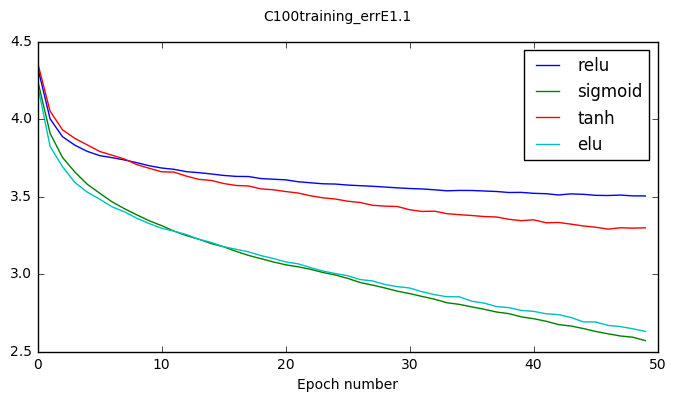

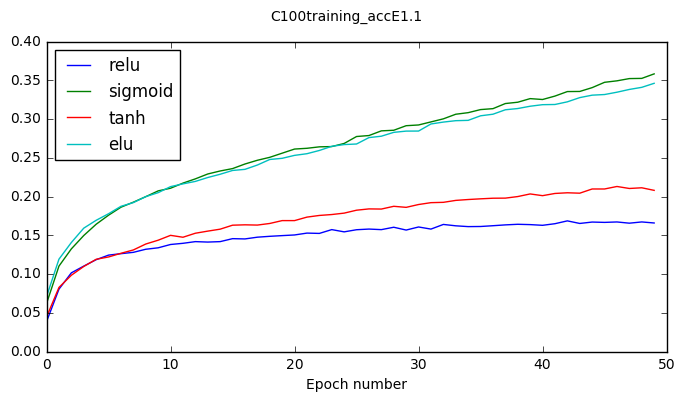

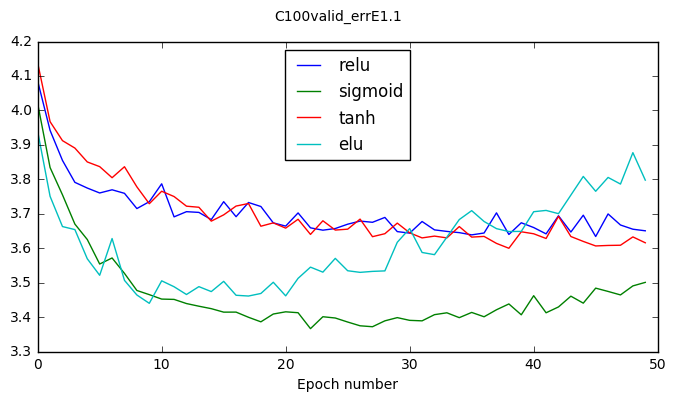

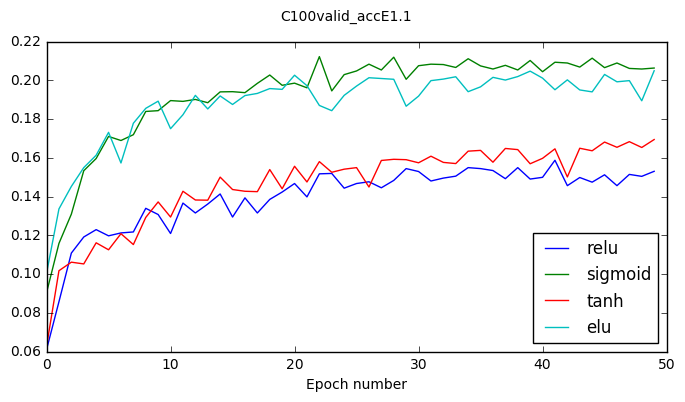

In [6]:
#
activations = [tf.nn.relu,tf.nn.sigmoid,tf.nn.tanh,tf.nn.elu]
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in range(loop):
    ax_1.plot(running_error_[k], label=activations[k].func_name)
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')

fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)

for k in range(loop):
    ax_2.plot(running_accuracy_[k], label=activations[k].func_name)
ax_2.legend(loc=0)
ax_2.set_xlabel('Epoch number')

fig_3 = plt.figure(figsize=(8, 4))
ax_3 = fig_3.add_subplot(111)
for k in range(loop):
    ax_3.plot(valid_error_[k], label=activations[k].func_name)
    
ax_3.legend(loc=0)
ax_3.set_xlabel('Epoch number')

fig_4 = plt.figure(figsize=(8, 4))
ax_4 = fig_4.add_subplot(111)
for k in range(loop):
    ax_4.plot(valid_accuracy_[k], label=activations[k].func_name)
    
ax_4.legend(loc=0)
ax_4.set_xlabel('Epoch number')

fig_1.suptitle("C100training_errE1.1")
fig_1.savefig("C100training_errE1.1.png")
fig_2.suptitle("C100training_accE1.1")
fig_2.savefig("C100training_accE1.1.png")
fig_3.suptitle("C100valid_errE1.1")
fig_3.savefig("C100valid_errE1.1.png")
fig_4.suptitle("C100valid_accE1.1")
fig_4.savefig("C100valid_accE1.1.png")

plt.show()

#E1.2

In [7]:
activations = [tf.nn.sigmoid, tf.nn.elu]
epoch=50
running_error_1_2=np.zeros((len(activations)+2,epoch))
running_accuracy_1_2 = np.zeros((len(activations)+2,epoch))
valid_error_1_2 = np.zeros((len(activations)+2,epoch))
valid_accuracy_1_2 = np.zeros((len(activations)+2,epoch))
loop1_2=0
## store result in 4 arrays
for activation in activations:
    print(activation.func_name+"--------------------------------------------------")
    inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
    targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
    num_hidden = 200

    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden, nonlinearity=activation)
    with tf.name_scope('fc-layer-2'):
        hidden_2 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden, nonlinearity=tf.nn.sigmoid)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)

    with tf.name_scope('error'):
        error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), tf.float32))
    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error) # update data

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for e in range(epoch):
            run_start_time = time.time()
            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches # divide according to the number of batches
            running_accuracy /= train_data.num_batches
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))
            running_error_1_2[loop1_2][e]=running_error
            running_accuracy_1_2[loop1_2][e]=running_accuracy
            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                    .format(valid_error, valid_accuracy))
            valid_error_1_2[loop1_2][e]=valid_error
            valid_accuracy_1_2[loop1_2][e]=valid_accuracy
            run_time = time.time() - run_start_time
            print('time for one epoch',run_time)
    loop1_2+=1
                

sigmoid--------------------------------------------------
End of epoch 01: err(train)=4.27 acc(train)=0.06
                 err(valid)=4.03 acc(valid)=0.08
('time for one epoch', 6.1237170696258545)
End of epoch 02: err(train)=3.93 acc(train)=0.11
                 err(valid)=3.86 acc(valid)=0.12
('time for one epoch', 6.116015911102295)
End of epoch 03: err(train)=3.77 acc(train)=0.13
                 err(valid)=3.75 acc(valid)=0.13
('time for one epoch', 6.098327875137329)
End of epoch 04: err(train)=3.68 acc(train)=0.14
                 err(valid)=3.70 acc(valid)=0.15
('time for one epoch', 6.105589866638184)
End of epoch 05: err(train)=3.61 acc(train)=0.16
                 err(valid)=3.66 acc(valid)=0.15
('time for one epoch', 6.142704963684082)
End of epoch 06: err(train)=3.56 acc(train)=0.17
                 err(valid)=3.61 acc(valid)=0.16
('time for one epoch', 6.28896689414978)
End of epoch 07: err(train)=3.50 acc(train)=0.18
                 err(valid)=3.58 acc(valid)=0.16
('ti

In [8]:
for activation in activations:
    print(activation.func_name+"--------------------------------------------------")
    inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
    targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
    num_hidden = 200

    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden, nonlinearity=activation)
    with tf.name_scope('fc-layer-2'):
        hidden_2 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden, nonlinearity=tf.nn.elu)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)

    with tf.name_scope('error'):
        error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), tf.float32))
    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error) # update data

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for e in range(epoch):
            run_start_time = time.time()
            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches # divide according to the number of batches
            running_accuracy /= train_data.num_batches
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))
            running_error_1_2[loop1_2][e]=running_error
            running_accuracy_1_2[loop1_2][e]=running_accuracy
            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                    .format(valid_error, valid_accuracy))
            valid_error_1_2[loop1_2][e]=valid_error
            valid_accuracy_1_2[loop1_2][e]=valid_accuracy
            run_time = time.time() - run_start_time
            print('time for one epoch',run_time)
    loop1_2+=1
                

sigmoid--------------------------------------------------
End of epoch 01: err(train)=4.26 acc(train)=0.06
                 err(valid)=4.04 acc(valid)=0.09
('time for one epoch', 5.9997639656066895)
End of epoch 02: err(train)=3.91 acc(train)=0.11
                 err(valid)=3.85 acc(valid)=0.12
('time for one epoch', 5.916749000549316)
End of epoch 03: err(train)=3.77 acc(train)=0.13
                 err(valid)=3.76 acc(valid)=0.13
('time for one epoch', 6.04899787902832)
End of epoch 04: err(train)=3.68 acc(train)=0.15
                 err(valid)=3.70 acc(valid)=0.15
('time for one epoch', 6.022439002990723)
End of epoch 05: err(train)=3.61 acc(train)=0.16
                 err(valid)=3.65 acc(valid)=0.16
('time for one epoch', 6.096977949142456)
End of epoch 06: err(train)=3.56 acc(train)=0.17
                 err(valid)=3.62 acc(valid)=0.16
('time for one epoch', 6.195271015167236)
End of epoch 07: err(train)=3.51 acc(train)=0.18
                 err(valid)=3.58 acc(valid)=0.17
('ti

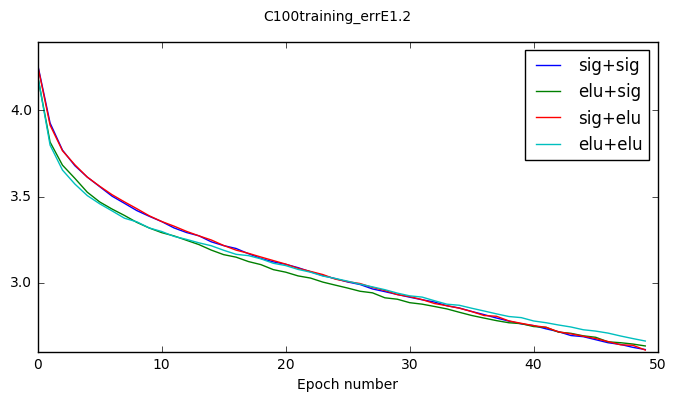

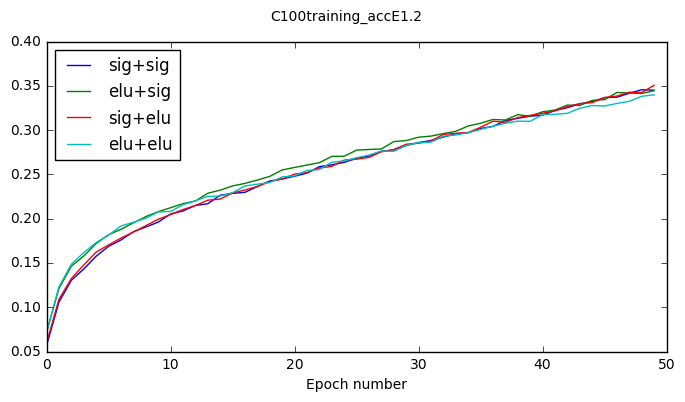

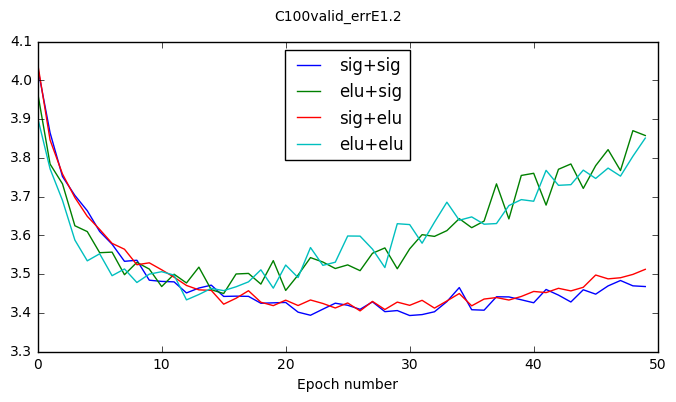

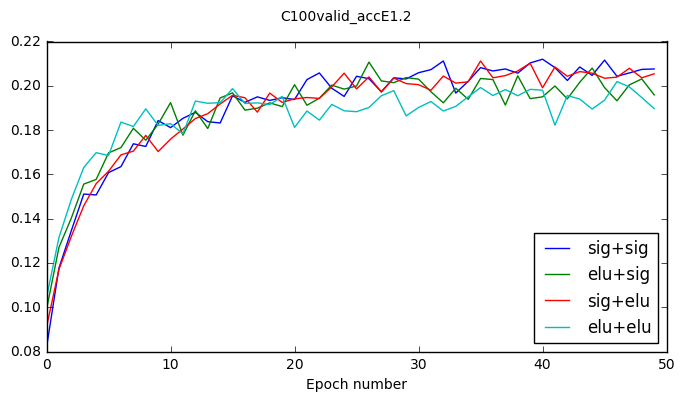

In [9]:
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)

labels=["sig+sig","elu+sig","sig+elu","elu+elu"]
for k in range(loop1_2):
    ax_1.plot(running_error_1_2[k], label=labels[k])
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')

fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)

for k in range(loop1_2):
    ax_2.plot(running_accuracy_1_2[k], label=labels[k])
ax_2.legend(loc=0)
ax_2.set_xlabel('Epoch number')

fig_3 = plt.figure(figsize=(8, 4))
ax_3 = fig_3.add_subplot(111)
for k in range(loop1_2):
    ax_3.plot(valid_error_1_2[k], label=labels[k])
    
ax_3.legend(loc=0)
ax_3.set_xlabel('Epoch number')

fig_4 = plt.figure(figsize=(8, 4))
ax_4 = fig_4.add_subplot(111)
for k in range(loop1_2):
    ax_4.plot(valid_accuracy_1_2[k], label=labels[k])
    
ax_4.legend(loc=0)
ax_4.set_xlabel('Epoch number')

fig_1.suptitle("C100training_errE1.2")
fig_1.savefig("C100training_errE1.2.png")
fig_2.suptitle("C100training_accE1.2")
fig_2.savefig("C100training_accE1.2.png")
fig_3.suptitle("C100valid_errE1.2")
fig_3.savefig("C100valid_errE1.2.png")
fig_4.suptitle("C100valid_accE1.2")
fig_4.savefig("C100valid_accE1.2.png")
# fig_2.savefig('2.pdf')
plt.show()

# Influence of depth

#E2.1

In [10]:
# 2 hidden
activations = [tf.nn.sigmoid,tf.nn.relu,tf.nn.tanh,tf.nn.elu]
epoch=50
running_error_E2H2=np.zeros((len(activations),epoch))
running_accuracy_E2H2 = np.zeros((len(activations),epoch))
valid_error_E2H2 = np.zeros((len(activations),epoch))
valid_accuracy_E2H2 = np.zeros((len(activations),epoch))
loop=0
## store result in 4 arrays
for activation in activations:
    print(activation.func_name+"--------------------------------------------------")
    inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
    targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
    num_hidden = 200

    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden, nonlinearity=activation)
    with tf.name_scope('layer-2'):
        hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        run_sum_time = time.time()
        for e in range(epoch):
            run_start_time = time.time()
            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))
            running_error_E2H2[loop][e]=running_error
            running_accuracy_E2H2[loop][e]=running_accuracy
            ##if (e + 1) % 5 == 0:
            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                    .format(valid_error, valid_accuracy))
            valid_error_E2H2[loop][e]=valid_error
            valid_accuracy_E2H2[loop][e]=valid_accuracy
            run_time = time.time() - run_start_time
            print run_time
        time_epochs=time.time()-run_sum_time
        print("sum time for epochs", time_epochs)
    loop+=1
                

sigmoid--------------------------------------------------
End of epoch 01: err(train)=4.26 acc(train)=0.05
                 err(valid)=4.06 acc(valid)=0.08
6.18992114067
End of epoch 02: err(train)=3.94 acc(train)=0.09
                 err(valid)=3.85 acc(valid)=0.11
6.35638594627
End of epoch 03: err(train)=3.79 acc(train)=0.12
                 err(valid)=3.77 acc(valid)=0.12
6.47458410263
End of epoch 04: err(train)=3.71 acc(train)=0.13
                 err(valid)=3.72 acc(valid)=0.13
6.33294010162
End of epoch 05: err(train)=3.65 acc(train)=0.14
                 err(valid)=3.66 acc(valid)=0.14
6.47684288025
End of epoch 06: err(train)=3.60 acc(train)=0.15
                 err(valid)=3.62 acc(valid)=0.15
6.4909620285
End of epoch 07: err(train)=3.56 acc(train)=0.16
                 err(valid)=3.63 acc(valid)=0.15
6.69286584854
End of epoch 08: err(train)=3.51 acc(train)=0.17
                 err(valid)=3.59 acc(valid)=0.16
6.67661595345
End of epoch 09: err(train)=3.48 acc(train)=0.1

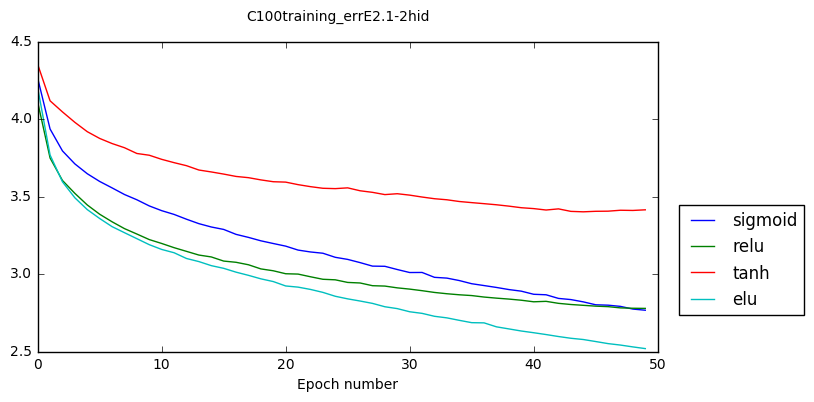

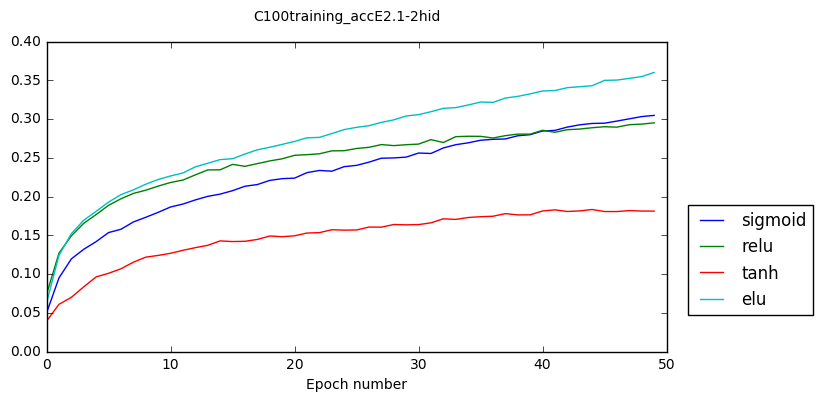

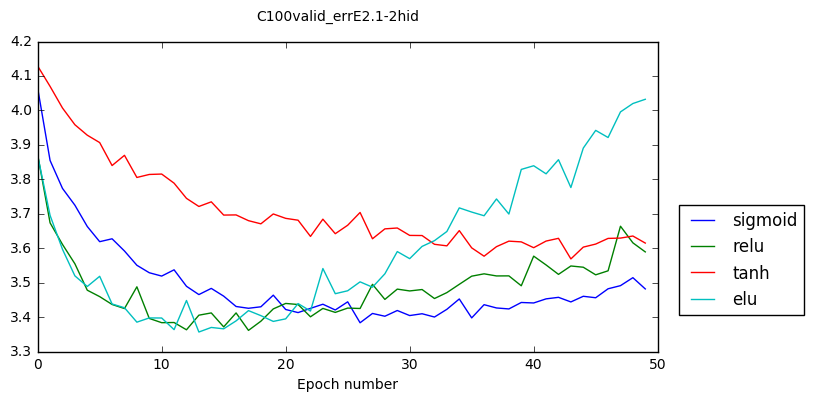

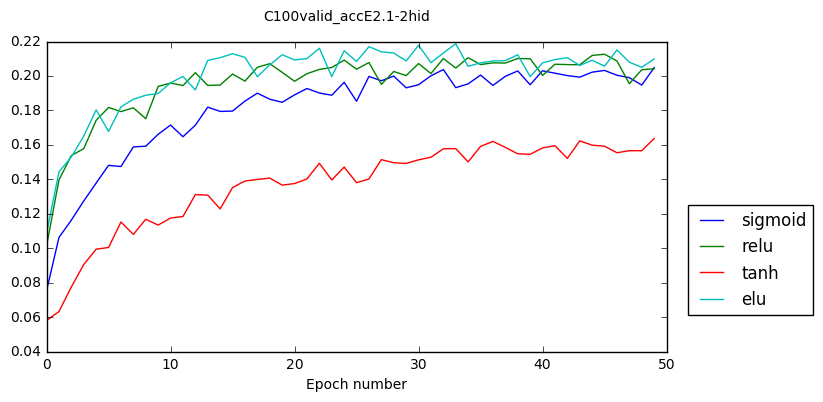

In [11]:
#
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in range(loop):
    ax_1.plot(running_error_E2H2[k], label=activations[k].func_name)
ax_1.legend(bbox_to_anchor=(1.25, 0.5))
ax_1.set_xlabel('Epoch number')

fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)

for k in range(loop):
    ax_2.plot(running_accuracy_E2H2[k], label=activations[k].func_name)
ax_2.legend(bbox_to_anchor=(1.25, 0.5))
ax_2.set_xlabel('Epoch number')

fig_3 = plt.figure(figsize=(8, 4))
ax_3 = fig_3.add_subplot(111)
for k in range(loop):
    ax_3.plot(valid_error_E2H2[k], label=activations[k].func_name)
    
ax_3.legend(bbox_to_anchor=(1.25, 0.5))
ax_3.set_xlabel('Epoch number')

fig_4 = plt.figure(figsize=(8, 4))
ax_4 = fig_4.add_subplot(111)
for k in range(loop):
    ax_4.plot(valid_accuracy_E2H2[k], label=activations[k].func_name)
    
# ax_4.legend(loc=0)
ax_4.set_xlabel('Epoch number')
ax_4.legend(bbox_to_anchor=(1.25, 0.5))

fig_1.suptitle("C100training_errE2.1-2hid")
fig_1.savefig("C100training_errE2.1-2hid.png")
fig_2.suptitle("C100training_accE2.1-2hid")
fig_2.savefig("C100training_accE2.1-2hid.png")
fig_3.suptitle("C100valid_errE2.1-2hid")
fig_3.savefig("C100valid_errE2.1-2hid.png")
fig_4.suptitle("C100valid_accE2.1-2hid")
fig_4.savefig("C100valid_accE2.1-2hid.png")

plt.show()

In [12]:
# 3 hidden
activations = [tf.nn.sigmoid,tf.nn.relu,tf.nn.tanh,tf.nn.elu]
epoch=50
running_error_E2H3=np.zeros((len(activations),epoch))
running_accuracy_E2H3 = np.zeros((len(activations),epoch))
valid_error_E2H3 = np.zeros((len(activations),epoch))
valid_accuracy_E2H3 = np.zeros((len(activations),epoch))
loop=0
## store result in 4 arrays
for activation in activations:
    print(activation.func_name+"--------------------------------------------------")
    inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
    targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
    num_hidden = 200

    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden, nonlinearity=activation)
    with tf.name_scope('layer-2'):
        hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    with tf.name_scope('layer-3'):
        hidden_3 = fully_connected_layer(hidden_2, num_hidden, num_hidden)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_3, num_hidden, train_data.num_classes, tf.identity)
    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        
        for e in range(epoch):
            run_start_time = time.time()
            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))
            running_error_E2H3[loop][e]=running_error
            running_accuracy_E2H3[loop][e]=running_accuracy
            ##if (e + 1) % 5 == 0:
            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                    .format(valid_error, valid_accuracy))
            valid_error_E2H3[loop][e]=valid_error
            valid_accuracy_E2H3[loop][e]=valid_accuracy
            run_time = time.time() - run_start_time
            print run_time
    loop+=1
                

sigmoid--------------------------------------------------
End of epoch 01: err(train)=4.26 acc(train)=0.05
                 err(valid)=4.07 acc(valid)=0.06
6.69900298119
End of epoch 02: err(train)=4.00 acc(train)=0.08
                 err(valid)=3.96 acc(valid)=0.09
7.08969593048
End of epoch 03: err(train)=3.86 acc(train)=0.10
                 err(valid)=3.79 acc(valid)=0.12
7.00081706047
End of epoch 04: err(train)=3.76 acc(train)=0.12
                 err(valid)=3.75 acc(valid)=0.12
7.15517115593
End of epoch 05: err(train)=3.70 acc(train)=0.13
                 err(valid)=3.69 acc(valid)=0.13
7.36105203629
End of epoch 06: err(train)=3.63 acc(train)=0.14
                 err(valid)=3.66 acc(valid)=0.14
7.81157302856
End of epoch 07: err(train)=3.58 acc(train)=0.15
                 err(valid)=3.63 acc(valid)=0.14
7.85655283928
End of epoch 08: err(train)=3.53 acc(train)=0.16
                 err(valid)=3.59 acc(valid)=0.15
8.4466278553
End of epoch 09: err(train)=3.50 acc(train)=0.1

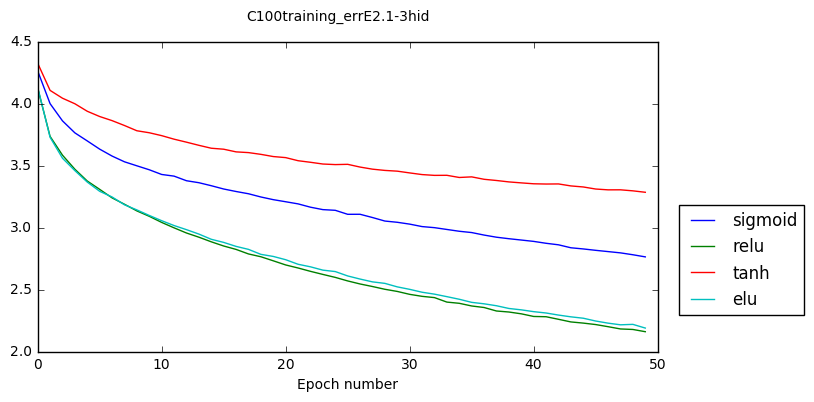

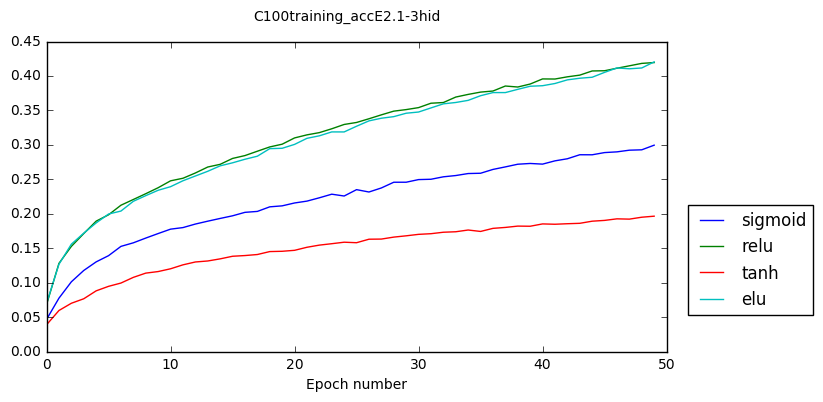

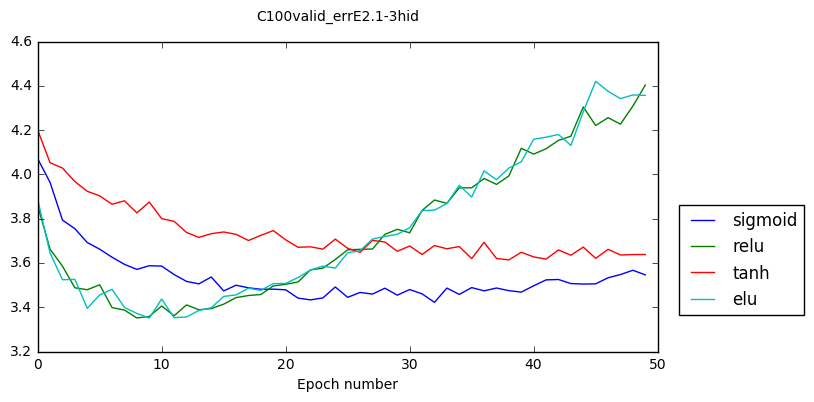

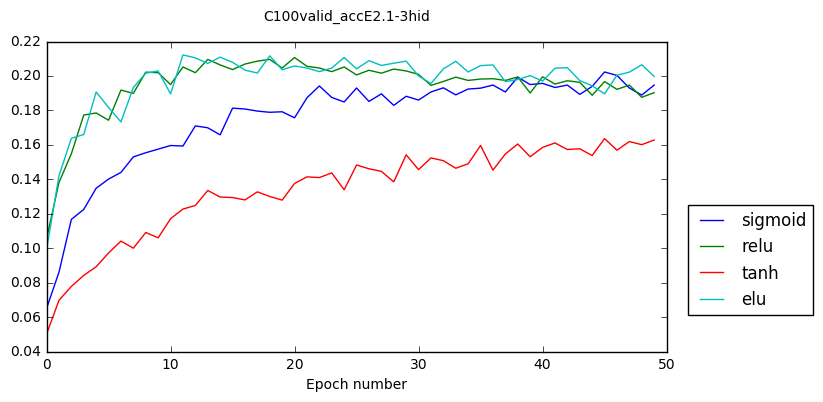

In [13]:
#
activations = [tf.nn.sigmoid,tf.nn.relu,tf.nn.tanh,tf.nn.elu]
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in range(loop):
    ax_1.plot(running_error_E2H3[k], label=activations[k].func_name)
ax_1.legend(bbox_to_anchor=(1.25, 0.5))
ax_1.set_xlabel('Epoch number')

fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)

for k in range(loop):
    ax_2.plot(running_accuracy_E2H3[k], label=activations[k].func_name)
ax_2.legend(bbox_to_anchor=(1.25, 0.5))
ax_2.set_xlabel('Epoch number')

fig_3 = plt.figure(figsize=(8, 4))
ax_3 = fig_3.add_subplot(111)
for k in range(loop):
    ax_3.plot(valid_error_E2H3[k], label=activations[k].func_name)
    
ax_3.legend(bbox_to_anchor=(1.25, 0.5))
ax_3.set_xlabel('Epoch number')

fig_4 = plt.figure(figsize=(8, 4))
ax_4 = fig_4.add_subplot(111)
for k in range(loop):
    ax_4.plot(valid_accuracy_E2H3[k], label=activations[k].func_name)
    
# ax_4.legend(loc=0)
ax_4.set_xlabel('Epoch number')
ax_4.legend(bbox_to_anchor=(1.25, 0.5))

fig_1.suptitle("C100training_errE2.1-3hid")
fig_1.savefig("C100training_errE2.1-3hid.png")
fig_2.suptitle("C100training_accE2.1-3hid")
fig_2.savefig("C100training_accE2.1-3hid.png")
fig_3.suptitle("C100valid_errE2.1-3hid")
fig_3.savefig("C100valid_errE2.1-3hid.png")
fig_4.suptitle("C100valid_accE2.1-3hid")
fig_4.savefig("C100valid_accE2.1-3hid.png")

plt.show()

In [14]:
# 4 hidden
activations = [tf.nn.sigmoid,tf.nn.relu,tf.nn.tanh,tf.nn.elu]
epoch=50
running_error_E2H4=np.zeros((len(activations),epoch))
running_accuracy_E2H4 = np.zeros((len(activations),epoch))
valid_error_E2H4 = np.zeros((len(activations),epoch))
valid_accuracy_E2H4 = np.zeros((len(activations),epoch))
loop=0
## store result in 4 arrays
for activation in activations:
    print(activation.func_name+"--------------------------------------------------")
    inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
    targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
    num_hidden = 200

    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden, nonlinearity=activation)
    with tf.name_scope('layer-2'):
        hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    with tf.name_scope('layer-3'):
        hidden_3 = fully_connected_layer(hidden_2, num_hidden, num_hidden)
    with tf.name_scope('layer-4'):
        hidden_4 = fully_connected_layer(hidden_3, num_hidden, num_hidden)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_4, num_hidden, train_data.num_classes, tf.identity)
    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        
        for e in range(epoch):
            run_start_time = time.time()
            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))
            running_error_E2H4[loop][e]=running_error
            running_accuracy_E2H4[loop][e]=running_accuracy
            ##if (e + 1) % 5 == 0:
            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                    .format(valid_error, valid_accuracy))
            valid_error_E2H4[loop][e]=valid_error
            valid_accuracy_E2H4[loop][e]=valid_accuracy
            run_time = time.time() - run_start_time
            print run_time
    loop+=1
                

sigmoid--------------------------------------------------
End of epoch 01: err(train)=4.25 acc(train)=0.04
                 err(valid)=4.08 acc(valid)=0.07
7.27065110207
End of epoch 02: err(train)=3.99 acc(train)=0.08
                 err(valid)=3.97 acc(valid)=0.09
7.44937491417
End of epoch 03: err(train)=3.87 acc(train)=0.10
                 err(valid)=3.88 acc(valid)=0.10
7.73064684868
End of epoch 04: err(train)=3.77 acc(train)=0.12
                 err(valid)=3.75 acc(valid)=0.12
8.04128789902
End of epoch 05: err(train)=3.69 acc(train)=0.13
                 err(valid)=3.70 acc(valid)=0.13
8.4164659977
End of epoch 06: err(train)=3.63 acc(train)=0.14
                 err(valid)=3.63 acc(valid)=0.14
8.59517502785
End of epoch 07: err(train)=3.59 acc(train)=0.15
                 err(valid)=3.66 acc(valid)=0.14
8.63382697105
End of epoch 08: err(train)=3.54 acc(train)=0.15
                 err(valid)=3.61 acc(valid)=0.14
8.99273085594
End of epoch 09: err(train)=3.50 acc(train)=0.1

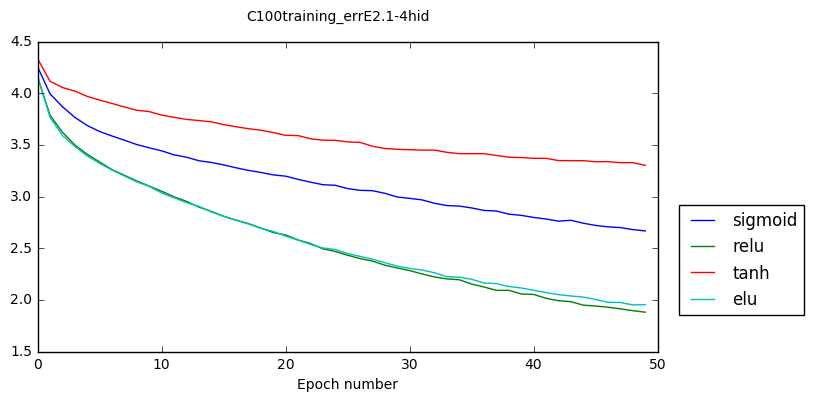

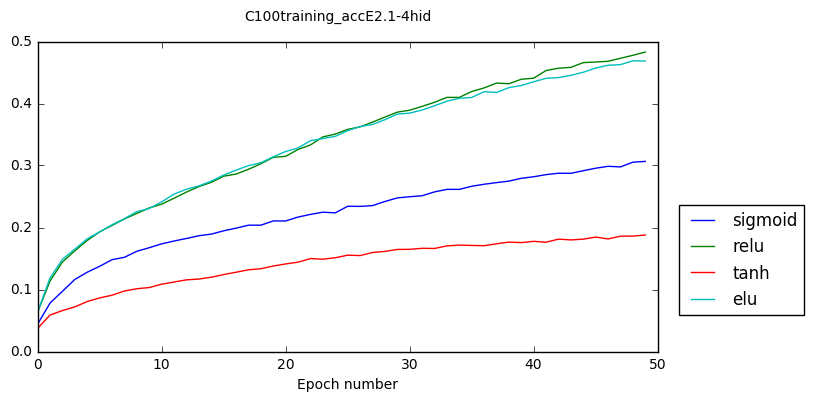

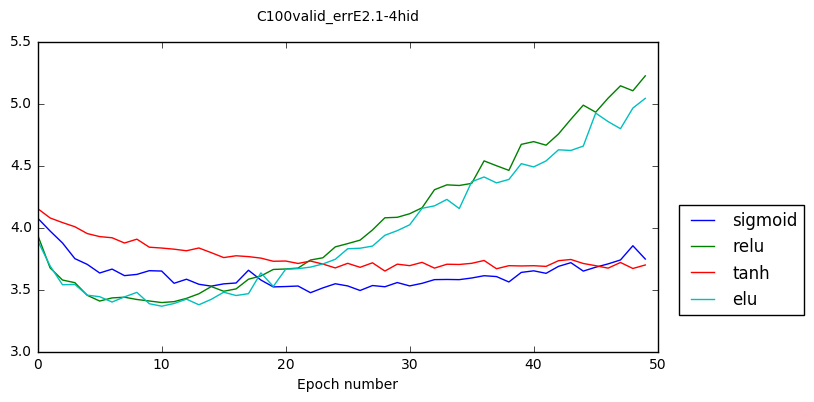

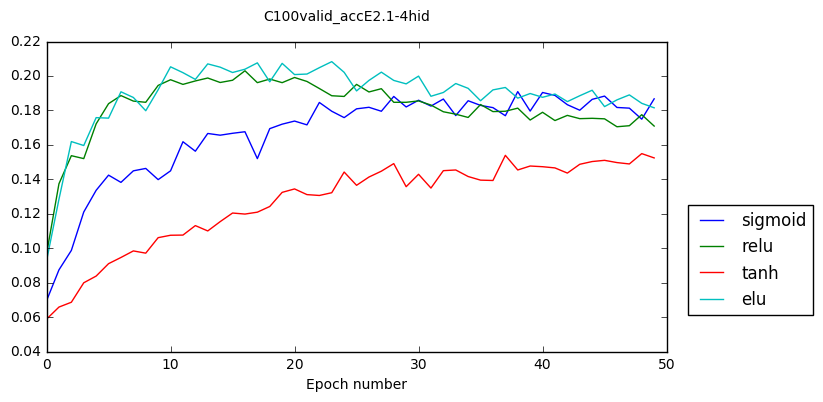

In [15]:
#
activations = [tf.nn.sigmoid,tf.nn.relu,tf.nn.tanh,tf.nn.elu]
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in range(loop):
    ax_1.plot(running_error_E2H4[k], label=activations[k].func_name)
ax_1.legend(bbox_to_anchor=(1.25, 0.5))
ax_1.set_xlabel('Epoch number')

fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)

for k in range(loop):
    ax_2.plot(running_accuracy_E2H4[k], label=activations[k].func_name)
ax_2.legend(bbox_to_anchor=(1.25, 0.5))
ax_2.set_xlabel('Epoch number')

fig_3 = plt.figure(figsize=(8, 4))
ax_3 = fig_3.add_subplot(111)
for k in range(loop):
    ax_3.plot(valid_error_E2H4[k], label=activations[k].func_name)
    
ax_3.legend(bbox_to_anchor=(1.25, 0.5))
ax_3.set_xlabel('Epoch number')

fig_4 = plt.figure(figsize=(8, 4))
ax_4 = fig_4.add_subplot(111)
for k in range(loop):
    ax_4.plot(valid_accuracy_E2H4[k], label=activations[k].func_name)
    
# ax_4.legend(loc=0)
ax_4.set_xlabel('Epoch number')
ax_4.legend(bbox_to_anchor=(1.25, 0.5))

fig_1.suptitle("C100training_errE2.1-4hid")
fig_1.savefig("C100training_errE2.1-4hid.png")
fig_2.suptitle("C100training_accE2.1-4hid")
fig_2.savefig("C100training_accE2.1-4hid.png")
fig_3.suptitle("C100valid_errE2.1-4hid")
fig_3.savefig("C100valid_errE2.1-4hid.png")
fig_4.suptitle("C100valid_accE2.1-4hid")
fig_4.savefig("C100valid_accE2.1-4hid.png")

plt.show()

# Influence of width

In [16]:
num_hiddens = [200,500,800,1100,1400,1700,2000]
epoch_n=50
running_error_n=np.zeros((len(num_hiddens),epoch))
running_accuracy_n = np.zeros((len(num_hiddens),epoch))
valid_error_n = np.zeros((len(num_hiddens),epoch))
valid_accuracy_n = np.zeros((len(num_hiddens),epoch))
loop_n=0

for num_hidden in num_hiddens:
    print num_hidden,"layers-----------------------------------"
    inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
    targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')

    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)

    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for e in range(epoch_n):
            run_start_time = time.time()
            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches # divide according to the number of batches
            running_accuracy /= train_data.num_batches
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))
            running_error_n[loop_n][e]=running_error
            running_accuracy_n[loop_n][e]=running_accuracy
            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                    .format(valid_error, valid_accuracy))
            valid_error_n[loop_n][e]=valid_error
            valid_accuracy_n[loop_n][e]=valid_accuracy
            run_time = time.time() - run_start_time
            print('time for one epoch',run_time)
    loop_n+=1

200 layers-----------------------------------
End of epoch 01: err(train)=4.32 acc(train)=0.04
                 err(valid)=4.09 acc(valid)=0.07
('time for one epoch', 6.5210161209106445)
End of epoch 02: err(train)=4.03 acc(train)=0.08
                 err(valid)=3.99 acc(valid)=0.08
('time for one epoch', 8.634498834609985)
End of epoch 03: err(train)=3.97 acc(train)=0.09
                 err(valid)=3.95 acc(valid)=0.09
('time for one epoch', 8.454068183898926)
End of epoch 04: err(train)=3.92 acc(train)=0.10
                 err(valid)=3.93 acc(valid)=0.10
('time for one epoch', 8.437608003616333)
End of epoch 05: err(train)=3.89 acc(train)=0.10
                 err(valid)=3.89 acc(valid)=0.10
('time for one epoch', 8.44277286529541)
End of epoch 06: err(train)=3.87 acc(train)=0.10
                 err(valid)=3.87 acc(valid)=0.10
('time for one epoch', 8.407709836959839)
End of epoch 07: err(train)=3.85 acc(train)=0.11
                 err(valid)=3.85 acc(valid)=0.11
('time for one e

KeyboardInterrupt: 

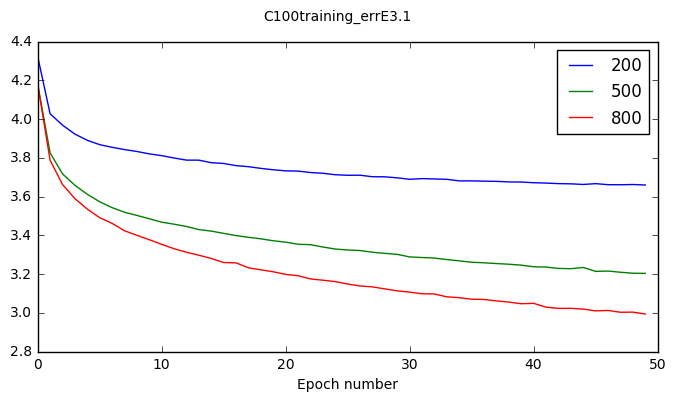

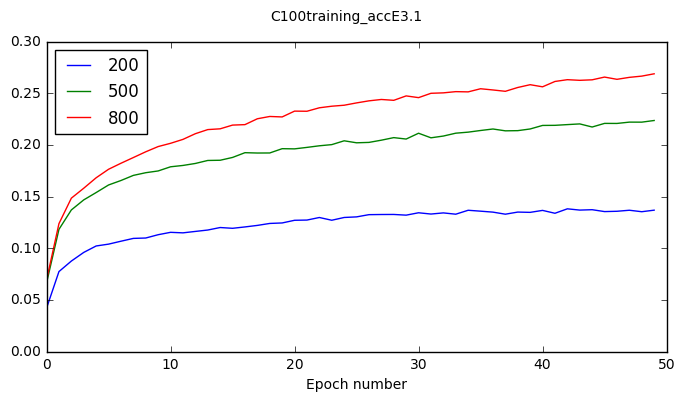

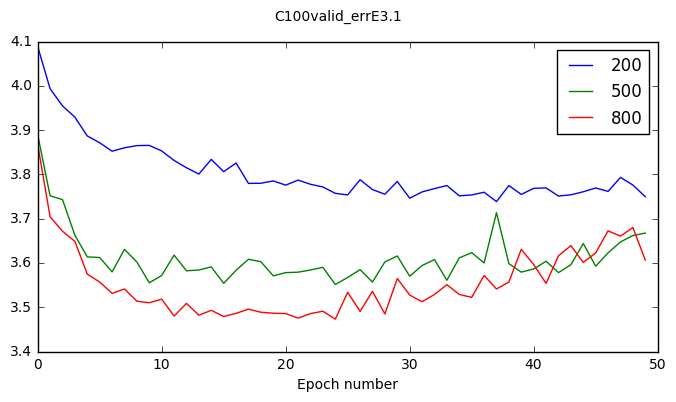

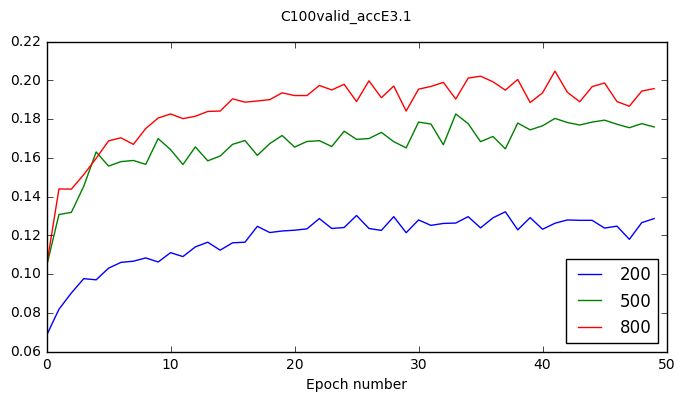

In [ ]:

fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)

for k in range(loop_n):
    ax_1.plot(running_error_n[k], label=num_hiddens[k])
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')

fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)

for k in range(loop_n):
    ax_2.plot(running_accuracy_n[k], label=num_hiddens[k])
ax_2.legend(loc=0)
ax_2.set_xlabel('Epoch number')

fig_3 = plt.figure(figsize=(8, 4))
ax_3 = fig_3.add_subplot(111)
for k in range(loop_n):
    ax_3.plot(valid_error_n[k], label=num_hiddens[k])
    
ax_3.legend(loc=0)
ax_3.set_xlabel('Epoch number')

fig_4 = plt.figure(figsize=(8, 4))
ax_4 = fig_4.add_subplot(111)
for k in range(loop_n):
    ax_4.plot(valid_accuracy_n[k], label=num_hiddens[k])
    
ax_4.legend(loc=0)
ax_4.set_xlabel('Epoch number')

fig_1.suptitle("C100training_errE3.1")
fig_1.savefig("C100training_errE3.1.png")
fig_2.suptitle("C100training_accE3.1")
fig_2.savefig("C100training_accE3.1.png")
fig_3.suptitle("C100valid_errE3.1")
fig_3.savefig("C100valid_errE3.1.png")
fig_4.suptitle("C100valid_accE3.1")
fig_4.savefig("C100valid_accE3.1.png")
# fig_2.savefig('2.pdf')
plt.show()

In [ ]:
num_hiddens = [200,500,800,1000,1300,1500,2000]
epoch_n=50
running_error_n=np.zeros((len(num_hiddens),epoch))
running_accuracy_n = np.zeros((len(num_hiddens),epoch))
valid_error_n = np.zeros((len(num_hiddens),epoch))
valid_accuracy_n = np.zeros((len(num_hiddens),epoch))
loop_n=0

for num_hidden in num_hiddens:
    print num_hidden,"layers-----------------------------------"
    inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
    targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')

    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)

    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for e in range(epoch_n):
            run_start_time = time.time()
            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches # divide according to the number of batches
            running_accuracy /= train_data.num_batches
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))
            running_error_n[loop_n][e]=running_error
            running_accuracy_n[loop_n][e]=running_accuracy
            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                    .format(valid_error, valid_accuracy))
            valid_error_n[loop_n][e]=valid_error
            valid_accuracy_n[loop_n][e]=valid_accuracy
            run_time = time.time() - run_start_time
            print('time for one epoch',run_time)
    loop_n+=1

200 layers-----------------------------------


In [ ]:
# cuole 
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)

for k in range(loop_n):
    ax_1.plot(running_error_n[k], label=num_hiddens[k])
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')

fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)

for k in range(loop_n):
    ax_2.plot(running_accuracy_n[k], label=num_hiddens[k])
ax_2.legend(loc=0)
ax_2.set_xlabel('Epoch number')

fig_3 = plt.figure(figsize=(8, 4))
ax_3 = fig_3.add_subplot(111)
for k in range(loop_n):
    ax_3.plot(valid_error_n[k], label=num_hiddens[k])
    
ax_3.legend(loc=0)
ax_3.set_xlabel('Epoch number')

fig_4 = plt.figure(figsize=(8, 4))
ax_4 = fig_4.add_subplot(111)
for k in range(loop_n):
    ax_4.plot(valid_accuracy_n[k], label=num_hiddens[k])
    
ax_4.legend(loc=0)
ax_4.set_xlabel('Epoch number')

fig_1.suptitle("training_errE3.1")
fig_1.savefig("training_errE3.1.png")
fig_2.suptitle("training_accE3.1")
fig_2.savefig("training_accE3.1.png")
fig_3.suptitle("valid_errE3.1")
fig_3.savefig("valid_errE3.1.png")
fig_4.suptitle("valid_accE3.1")
fig_4.savefig("valid_accE3.1.png")
# fig_2.savefig('2.pdf')
plt.show()

### CIFAR-100

In [ ]:
train_data = CIFAR100DataProvider('train', batch_size=50)
valid_data = CIFAR100DataProvider('valid', batch_size=50)

In [ ]:
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
    
init = tf.global_variables_initializer()

In [ ]:
sess = tf.Session()
sess.run(init)
for e in range(10):
    running_error = 0.
    running_accuracy = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_accuracy += batch_acc
    running_error /= train_data.num_batches
    running_accuracy /= train_data.num_batches
    print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
          .format(e + 1, running_error, running_accuracy))
    if (e + 1) % 5 == 0:
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

## Predicting test data classes and creating a Kaggle submission file

An optional [Kaggle in Class](https://inclass.kaggle.com/c/ml2016-7-cifar-100) competition (see email for invite link, you will need to sign-up with a `ed.ac.uk` email address to be able to enter) is being run on the CIFAR-100 (fine-grained) classification task. The scores for the competition are calculated by calculating the proportion of classes correctly predicted on the test set inputs (for which no class labels are provided). Half of the 10000 test inputs are used to calculate a public leaderboard score which will be visible while the competition is in progress and the other half are used to compute the private leaderboard score which will only be unveiled at the end of the competition. Each entrant can make up to two submissions of predictions each day during the competition.

The code and helper function below illustrate how to use the predicted outputs of the TensorFlow network model we just trained to create a submission file which can be uploaded to Kaggle. The required format of the submission file is a `.csv` (Comma Separated Variable) file with two columns: the first is the integer index of the test input in the array in the provided data file (i.e. first row 0, second row 1 and so on) and the second column the corresponding predicted class label as an integer between 0 and 99 inclusive. The predictions must be preceded by a header line as in the following example

```
Id,Class
0,81
1,35
2,12
...
```

Integer class label predictions can be computed from the class probability outputs of the model by performing an `argmax` operation along the last dimension.

In [ ]:
test_inputs = np.load(os.path.join(os.environ['MLP_DATA_DIR'], 'cifar-100-test-inputs.npz'))['inputs']
test_predictions = sess.run(tf.nn.softmax(outputs), feed_dict={inputs: test_inputs})

In [ ]:
def create_kaggle_submission_file(predictions, output_file, overwrite=False):
    if predictions.shape != (10000, 100):
        raise ValueError('predictions should be an array of shape (10000, 25).')
    if not (np.all(predictions >= 0.) and 
            np.all(predictions <= 1.)):
        raise ValueError('predictions should be an array of probabilities in [0, 1].')
    if not np.allclose(predictions.sum(-1), 1):
        raise ValueError('predictions rows should sum to one.')
    if os.path.exists(output_file) and not overwrite:
        raise ValueError('File already exists at {0}'.format(output_file))
    pred_classes = predictions.argmax(-1)
    ids = np.arange(pred_classes.shape[0])
    np.savetxt(output_file, np.column_stack([ids, pred_classes]), fmt='%d',
               delimiter=',', header='Id,Class', comments='')

In [ ]:
create_kaggle_submission_file(test_predictions, 'cifar-100-example-network-submission.csv', True)